In [177]:
import math
import torch
import numpy as np
from torch.optim.lr_scheduler import LambdaLR
import matplotlib.pyplot as plt

In [178]:
def custom_lr_scheduler(optimizer, warmup_iterations, total_iterations):
    def lr_lambda(iteration):
        if iteration < warmup_iterations:
            return 1
        elif iteration < total_iterations:
            cosine_decay = 0.5 * (1 + math.cos(
                math.pi * (iteration - warmup_iterations) / (total_iterations - warmup_iterations)))
            return 0.6 + 0.4 * cosine_decay
        else:
            return 0.6
    return LambdaLR(optimizer, lr_lambda)


def custom_lr_scheduler_poly(optimizer, warmup_iterations, total_iterations):
    def lr_lambda(iteration):
        return ((1 - float(iteration) / 1000000) ** 0.5)
    return LambdaLR(optimizer, lr_lambda)


def custom_lr_scheduler_cosine(optimizer, warmup_iterations, total_iterations):
    def lr_lambda(iteration):
        return (0.5 * (1 + np.cos(np.pi * iteration / 1000000)) / 2)
    return LambdaLR(optimizer, lr_lambda)


beta = torch.tensor(0.0, requires_grad=False)
optimizer = torch.optim.SGD([beta], lr=1)
scheduler = custom_lr_scheduler(optimizer, 50000, 500000)

In [179]:
X = np.arange(1000000)

In [180]:
Y = []
for i in range(1000000):
    optimizer.step()
    beta = scheduler.get_last_lr()
    Y.append(beta)
    scheduler.step()

[0.6]


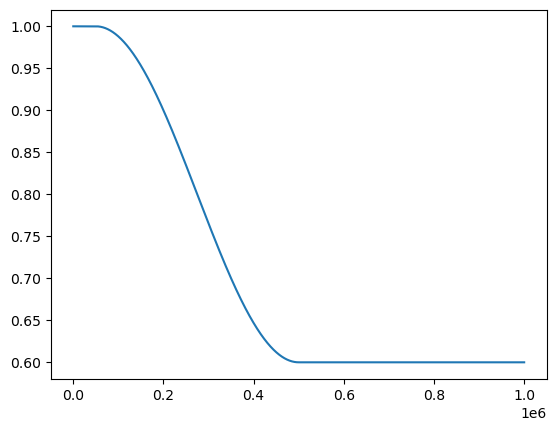

In [181]:
plt.plot(X, Y)
print(Y[600000])